In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 9
model_name_list = ["untran-resnet18"]

1591153511.6177707


In [2]:
model1 = models.resnet18(pretrained = False)
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
model1.fc=nn.Linear(512,6)

In [5]:
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

untran-resnet18
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.4613, Accuracy: 45.3054%,Valid: Loss: 1.5670, Accuracy: 41.7683%,Time: 7.6963s
Epoch: 2
Epoch: 002, Training: Loss: 1.7729, Accuracy: 32.4661%,Valid: Loss: 1.6286, Accuracy: 32.9268%,Time: 8.0604s
Epoch: 3
Epoch: 003, Training: Loss: 1.5074, Accuracy: 37.8394%,Valid: Loss: 1.5165, Accuracy: 40.8537%,Time: 7.7029s
Epoch: 4
Epoch: 004, Training: Loss: 1.4087, Accuracy: 42.3077%,Valid: Loss: 1.5598, Accuracy: 39.0244%,Time: 7.6898s
Epoch: 5
Epoch: 005, Training: Loss: 1.3975, Accuracy: 42.6471%,Valid: Loss: 1.4425, Accuracy: 37.8049%,Time: 7.9444s
Epoch: 6
Epoch: 006, Training: Loss: 1.3382, Accuracy: 45.8145%,Valid: Loss: 1.4040, Accuracy: 48.1707%,Time: 8.0668s
Epoch: 7
Epoch: 007, Training: Loss: 1.3657, Accuracy: 46.7195%,Valid: Loss: 1.5794, Accuracy: 39.0244%,Time: 8.1445s
Epoch: 8
Epoch: 008, Training: Loss: 1.2954, Accuracy: 48.2466%,Valid: Loss: 1.2989, Accuracy: 54.8780%,Time: 8.1178s
Epoch: 9
Epoch: 009, Training: 

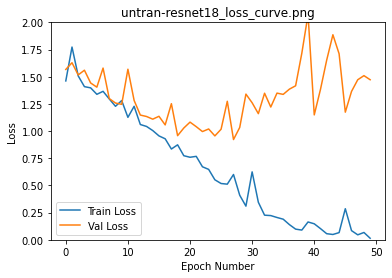

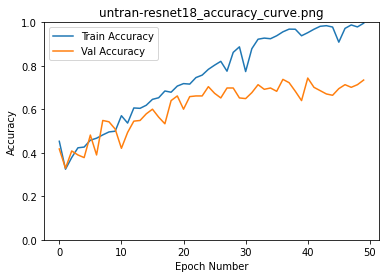

RuntimeError: CUDA error: out of memory

In [6]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1